In [2]:
import os
import sys
import numpy as np
import pandas as pd
import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_settings_v3 import *
from plot_auxiliary import *
from planar import create_proximity_graph
from auxiliary import get_base_network_name, getLinearReg, powerlaw

%matplotlib inline

128
256
512
1024


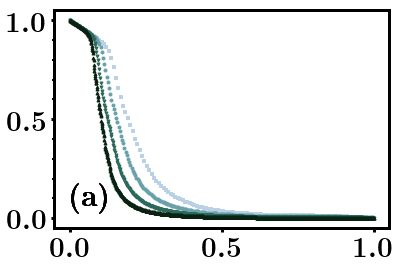

In [4]:
def plot_Sgcc(dfs, ax):
    
    N_values = list(dfs.keys())
    for i, N in enumerate(N_values):
        print(N)
        df = dfs[N]
        L = np.sqrt(N)
    
        ax.text(0.05, 0.1, letters[0], transform=ax.transAxes, fontsize=30)
        ax.plot(df.f, df.Sgcc, linestyle='', marker=markers[i], markersize=3,
                label=r'${{{}}}$'.format(N), color=colormap[i])
    
    return ax

net_type = 'PDT'
param = 'param'
attack = 'BtwU'

net_dir = os.path.join('..', 'networks', net_type)

sizes = [128, 256, 512, 1024, 2048]

dfs = {}
for N in sizes:
    try:
        dfs[N] = load_dataframe(net_type, N, param, attack, min_nseeds=100)
    except FileNotFoundError:
        continue

N_values = np.sort(list(dfs.keys()))
L_values = np.sqrt(N_values)

colormap = sns.cubehelix_palette(
    len(L_values), start=2, rot=0.3, light=0.8, dark=0.1
)

fig, ax = plt.subplots()
plot_Sgcc(dfs, ax)

In [ ]:
#fc = 0.04
fc = 0.0
one_over_nu = 0.68
nu = 1 / one_over_nu

attack = 'BtwU'
sizes = [128, 256, 512, 1024, 2048]

dfs = {}
for N in sizes:
    try:
        dfs[N] = load_dataframe(net_type, N, param, attack, min_nseeds=100)
    except FileNotFoundError:
        continue
        
N_values = np.sort(list(dfs.keys()))
L_values = np.sqrt(N_values)

colormap = sns.cubehelix_palette(
    len(L_values), start=2, rot=0.3, light=0.8, dark=0.1
)

ncols = 2
nrows = 3
fig, axes = plt.subplots(figsize=(6*ncols, 5*nrows), ncols=ncols, nrows=nrows)
    
for ax in axes[:,0]:
    ax.set_xlim(0, 0.5)
    ax.set_xlabel(r'$f$')
for ax in axes[:,1]:
    ax.set_xlim(-0.4, 2.5)
    ax.set_xlabel(r'$(f-f_c) L^{1/\nu}$')
    
ax = axes[0,0]
ax.set_ylabel(r'$S_1$')
ax = axes[1,0]
ax.set_ylabel(r'$\langle s\rangle$')
ax = axes[2,0]
ax.set_ylabel(r'$S_2L^2$')

ax = axes[0,1]
#ax.set_ylim(0.1, 1.05)
ax.set_ylabel(r'$S_1 L^{\beta/\nu}$')
ax = axes[1,1]
ax.set_ylabel(r'$\langle s\rangle L^{-\gamma/\nu}$')
ax = axes[2,1]
ax.set_ylabel(r'$S_2 L^{\beta/\nu}$')

for i, N in enumerate(N_values):
    print(N)
    df = dfs[N]
    L = np.sqrt(N)

    ax = axes[0,0]
    ax.text(0.05, 0.1, letters[0], transform=ax.transAxes, fontsize=30)
    ax.plot(df.f, df.Sgcc, linestyle='', marker=markers[i], markersize=3,
            label=r'${{{}}}$'.format(N), color=colormap[i])
    
    ax = axes[0,1]
    ax.text(0.8, 0.8, letters[3], transform=ax.transAxes, fontsize=30)
    beta = 0
    beta_over_nu = beta / nu
    ax.plot((df.f-fc)*L**one_over_nu, df.Sgcc*N**(beta_over_nu), linestyle='', marker=markers[i], markersize=3,
        label=r'${{{}}}$'.format(N), color=colormap[i])
    ax.text(0.52, 0.6, r'$f_c = {{{:.3f}}}$'.format(fc), 
        transform=ax.transAxes, fontsize=26)
    ax.text(0.52, 0.5, r'$1/\nu = {{{:.2f}}}$'.format(one_over_nu), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.52, 0.4, r'$\beta/\nu = {{{:.2f}}}$'.format(beta_over_nu), 
            transform=ax.transAxes, fontsize=26)
    
    
    ax = axes[1,0]
    ax.text(0.8, 0.8, letters[1], transform=ax.transAxes, fontsize=30)
    ax.plot(
        df.f, df.meanS, linestyle='', marker=markers[i], markersize=3, color=colormap[i]
    )
    ax = axes[1,1]
    ax.text(0.8, 0.8, letters[4], transform=ax.transAxes, fontsize=30)
    gamma_over_nu = 2.0
    gamma = gamma_over_nu * nu
    ax.plot(
        (df.f-fc)*L**one_over_nu, df.meanS*L**(-gamma_over_nu), linestyle='', 
        marker=markers[i], markersize=3, color=colormap[i]
    )
    ax.text(0.3, 0.15, r'$1/\nu = {{{:.2f}}}$'.format(one_over_nu), 
        transform=ax.transAxes, fontsize=26)
    ax.text(0.3, 0.05, r'$\gamma/\nu = {{{:.2f}}}$'.format(gamma_over_nu), 
            transform=ax.transAxes, fontsize=26)
    
    
    ax = axes[2,0]
    ax.text(0.8, 0.8, letters[2], transform=ax.transAxes, fontsize=30)
    ax.plot(
        df.f, df.Nsec, linestyle='', marker=markers[i], markersize=3, color=colormap[i]
    )
    ax = axes[2,1]
    ax.text(0.8, 0.8, letters[5], transform=ax.transAxes, fontsize=30)
    beta = 0.0
    beta_over_nu = beta / nu
    ax.plot(
        (df.f-fc)*L**one_over_nu, df.Nsec*L**(beta_over_nu-2), linestyle='', 
        marker=markers[i], markersize=3, color=colormap[i]
    )
    ax.text(0.4, 0.2, r'$1/\nu = {{{:.2f}}}$'.format(one_over_nu), 
        transform=ax.transAxes, fontsize=26)
    ax.text(0.4, 0.1, r'$\beta/\nu = {{{:.2f}}}$'.format(beta_over_nu), 
            transform=ax.transAxes, fontsize=26)


legend = axes[0,0].legend(fontsize=22, frameon=False)
legend.set_title(r'$L^2$', prop={'size':22})

sns.despine()
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'collapse_RB_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()